# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_excel('cost_revenue_dirty1.csv.xlsx')
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-02-08 00:00:00,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,1916-09-05 00:00:00,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1925-01-01 00:00:00,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,2018-08-10 00:00:00,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
data.shape

(5391, 6)

In [6]:
data.isna().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [7]:
data.duplicated().any()

False

In [8]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [9]:
print(type(data['Movie_Title'][0]), type(data['Rank'][0]), type(data['Release_Date'][0]), type(data['USD_Production_Budget'][0]), type(data['USD_Worldwide_Gross'][0]))


<class 'str'> <class 'numpy.int64'> <class 'datetime.datetime'> <class 'str'> <class 'str'>


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [10]:
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'].str.replace('[$,]', '', regex=True))

In [11]:
data['USD_Worldwide_Gross']=pd.to_numeric(data['USD_Worldwide_Gross'].str.replace('[$,]', '', regex=True))

In [12]:
data['USD_Domestic_Gross']=pd.to_numeric(data['USD_Domestic_Gross'].str.replace('[$,]', '', regex=True))

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [13]:
data['Release_Date']=pd.to_datetime(data['Release_Date'])
data


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-02-08,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-09-05,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,2018-08-10,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [14]:
data['USD_Production_Budget'].mean()

31113737.57837136

In [15]:
data['USD_Worldwide_Gross'].mean()

88855421.96271564

In [16]:
print(f"Domestic: min:{data['USD_Domestic_Gross'].min()}- {data[data['USD_Domestic_Gross']==data['USD_Domestic_Gross'].min()].Movie_Title}, max: {data['USD_Domestic_Gross'].max()}-{data[data['USD_Domestic_Gross']==data['USD_Domestic_Gross'].max()].Movie_Title}")
print(f"Worldwide: min {data['USD_Worldwide_Gross'].min()}- {data[data['USD_Worldwide_Gross']==data['USD_Worldwide_Gross'].min()].Movie_Title}, max:{data['USD_Worldwide_Gross'].max()}-{data[data['USD_Worldwide_Gross']==data['USD_Worldwide_Gross'].max()].Movie_Title}")

Domestic: min:0- 1                            Intolerance
6                                  Wings
8                          Hell's Angels
17      Charge of the Light Brigade, The
27               How Green Was My Valley
                      ...               
5386                                 Meg
5387                             Aquaman
5388                         Singularity
5389              Hannibal the Conqueror
5390      Story of Bonnie and Clyde, The
Name: Movie_Title, Length: 512, dtype: object, max: 936662225-5079    Star Wars Ep. VII: The Force Awakens
Name: Movie_Title, dtype: object
Worldwide: min 0- 1                            Intolerance
6                                  Wings
8                          Hell's Angels
17      Charge of the Light Brigade, The
27               How Green Was My Valley
                      ...               
5386                                 Meg
5387                             Aquaman
5388                         Singularity
5389 

In [17]:
data['USD_Worldwide_Gross'].describe()

count           5,391.00
mean       88,855,421.96
std       168,457,757.00
min                 0.00
25%         3,865,206.00
50%        27,450,453.00
75%        96,454,455.00
max     2,783,918,982.00
Name: USD_Worldwide_Gross, dtype: float64

In [18]:
data['USD_Domestic_Gross'].describe()

count         5,391.00
mean     41,235,519.44
std      66,029,346.27
min               0.00
25%       1,330,901.50
50%      17,192,205.00
75%      52,343,687.00
max     936,662,225.00
Name: USD_Domestic_Gross, dtype: float64

In [19]:
data['Worldwide_profit']=data['USD_Worldwide_Gross']-data['USD_Production_Budget']
data['Worldwide_profit'].describe()

count           5,391.00
mean       57,741,684.38
std       140,972,329.93
min      -175,000,000.00
25%        -2,244,775.00
50%         8,122,000.00
75%        59,518,660.00
max     2,358,918,982.00
Name: Worldwide_profit, dtype: float64

In [20]:
print(f"Highest revenue: {data['Worldwide_profit'].max()}-{data[data['Worldwide_profit']==data['Worldwide_profit'].max()].Movie_Title}, Lowest: {data['Worldwide_profit'].min()}-{data[data['Worldwide_profit']==data['Worldwide_profit'].min()].Movie_Title}")

Highest revenue: 2358918982-3529    Avatar
Name: Movie_Title, dtype: object, Lowest: -175000000-5388    Singularity
Name: Movie_Title, dtype: object


In [21]:
print(f"Production budget: min{data['USD_Production_Budget'].min()}-{data[data['USD_Production_Budget']==data['USD_Production_Budget'].min()].Movie_Title}, max: {data['USD_Production_Budget'].max()}-{data[data['USD_Production_Budget']==data['USD_Production_Budget'].max()].Movie_Title}")

Production budget: min1100-2427    My Date With Drew
Name: Movie_Title, dtype: object, max: 425000000-3529    Avatar
Name: Movie_Title, dtype: object


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [22]:
(data['USD_Domestic_Gross']==0).sum()

512

In [23]:
data_zero_gross=data[data['USD_Domestic_Gross']==0]
data_zero_gross[data_zero_gross['USD_Production_Budget']==data_zero_gross['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000


In [24]:
data_zero_gross.sort_values(by='USD_Production_Budget', ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-03-09,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-08-10,Amusement Park,100000000,0,0,-100000000
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [25]:
(data['USD_Worldwide_Gross']==0).sum()

357

In [26]:
data_zero_world=data[data['USD_Worldwide_Gross']==0]
data_zero_world[data_zero_world['USD_Production_Budget']==data_zero_world['USD_Production_Budget'].max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000


In [27]:
data_zero_world.sort_values(by='USD_Production_Budget', ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-03-09,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-08-10,Amusement Park,100000000,0,0,-100000000
5058,880,2015-12-11,The Ridiculous 6,60000000,0,0,-60000000


### Filtering on Multiple Conditions

In [28]:
international=data.loc[(data['USD_Domestic_Gross']==0) & (data['USD_Worldwide_Gross']!=0)]

print(len(international))

155


In [29]:
international.head(5)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-11-02,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [30]:
international_v2=data.query('USD_Domestic_Gross==0 and USD_Worldwide_Gross!=0')

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [41]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
not_released=data.query('Release_Date >= "2018-04-30"')
not_released

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_profit
5385,366,2018-08-10,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-08-10,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000


In [42]:
print(len(not_released))

6


In [43]:
clean_data=data.query('Release_Date<="2018-04-30"')

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [49]:
movies_losing_money=clean_data.query('USD_Production_Budget >USD_Worldwide_Gross')


In [51]:
precentage=(len(movies_losing_money)/len(data))*100
precentage

37.24726395844927

# Seaborn for Data Viz: Bubble Charts

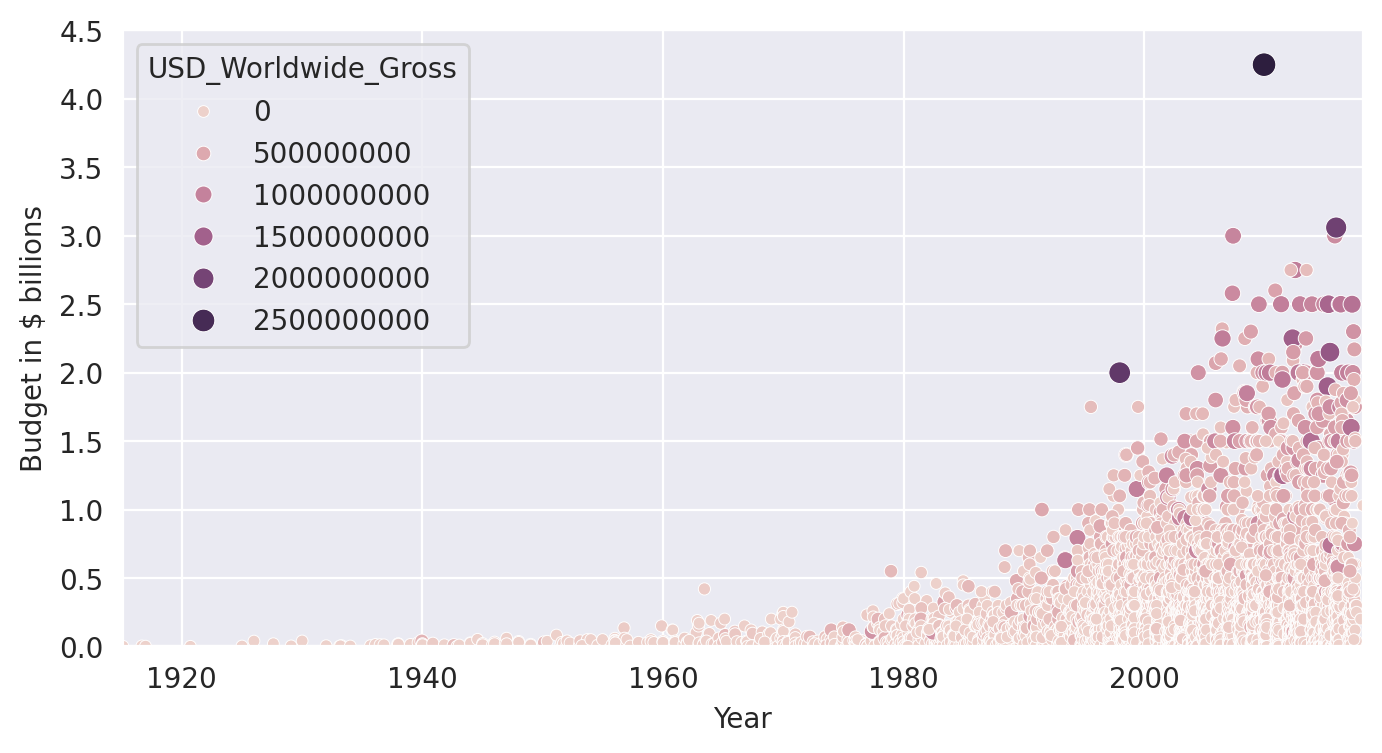

In [85]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
# Divide 'USD_Production_Budget' by 1e9 to convert to billions
    ax = sns.scatterplot(data=clean_data,
                        x=clean_data['Release_Date'].dt.date,
                        y=clean_data['USD_Production_Budget'] / 1e8,
                        hue='USD_Worldwide_Gross',
                        size='USD_Worldwide_Gross')

    ax.set(ylim=(0, 4.5),

          xlim=(clean_data['Release_Date'].min().date(), clean_data['Release_Date'].max().date()),
          ylabel='Budget in $ billions',
          xlabel='Year',
          )

plt.show()


### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [92]:
years=pd.DatetimeIndex(clean_data['Release_Date']).year
decades=(years//10)*10
decades

clean_data['Decade']=decades

<ipython-input-92-7baf00a0a1b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Decade']=decades


In [93]:
clean_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_profit,Decade
0,5293,1915-02-08,The Birth of a Nation,110000,11000000,10000000,10890000,1910
1,5140,1916-09-05,Intolerance,385907,0,0,-385907,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,1920
...,...,...,...,...,...,...,...,...
5380,70,2017-03-10,Kong: Skull Island,185000000,561137727,168052812,376137727,2010
5381,94,2017-05-12,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392,2010
5382,1254,2017-05-12,Snatched,42000000,57850343,45850343,15850343,2010
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0,-20000000,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [100]:
old_films=clean_data.query('Decade<=1960')
new_films=clean_data.query('Decade>=1970')


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_profit,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,-25000000,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,-17000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,50500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,-8800000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,78100000,1970
...,...,...,...,...,...,...,...,...
5380,70,2017-03-10,Kong: Skull Island,185000000,561137727,168052812,376137727,2010
5381,94,2017-05-12,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392,2010
5382,1254,2017-05-12,Snatched,42000000,57850343,45850343,15850343,2010
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0,-20000000,2010


In [101]:
len(old_films)

153

In [105]:
old_films.sort_values(by='USD_Production_Budget', ascending=False).head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_profit,Decade
109,1253,1963-06-12,Cleopatra,42000000,71000000,57000000,29000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,-12000000,1960


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

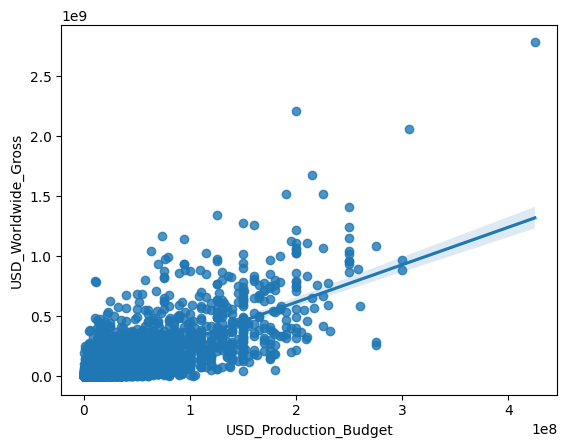

In [106]:
sns.regplot(data=new_films, x='USD_Production_Budget',y='USD_Worldwide_Gross')

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

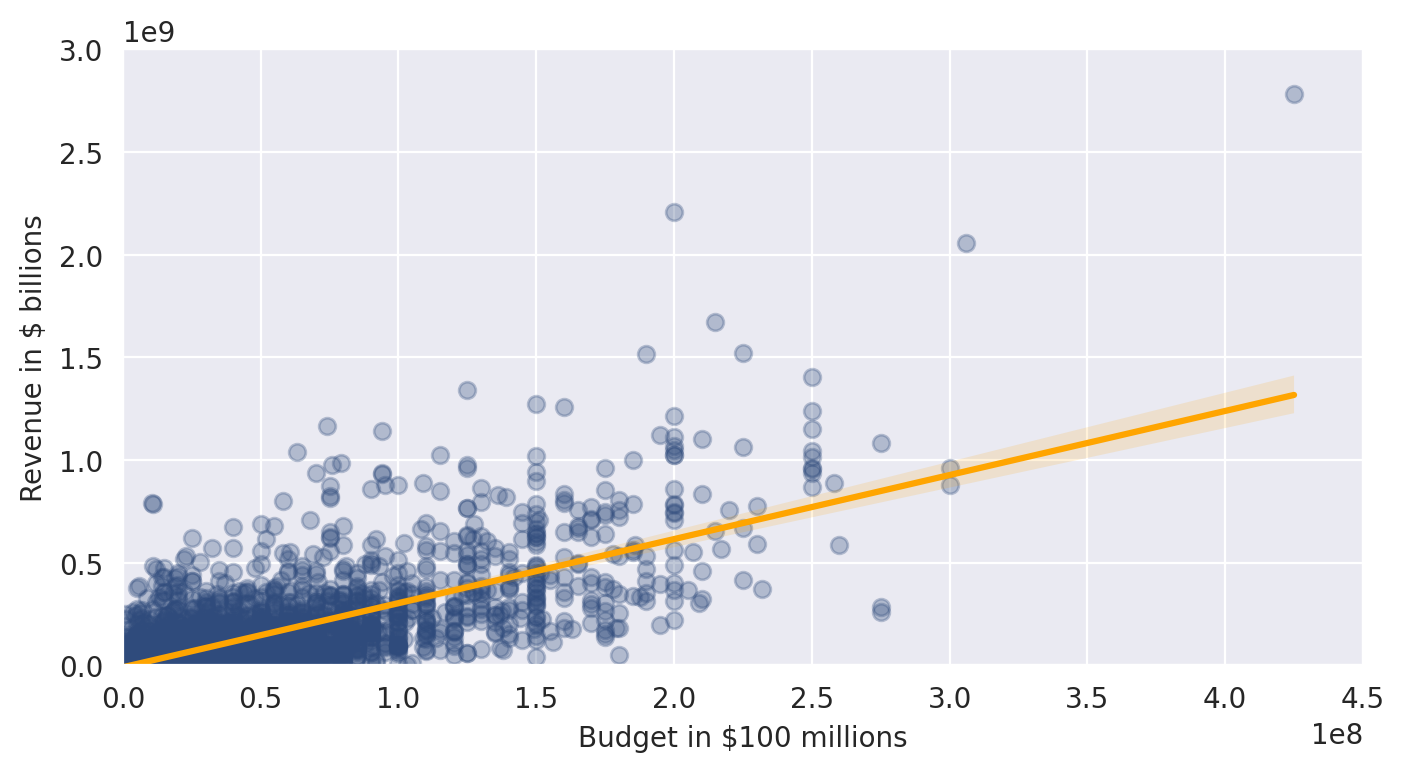

In [121]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax=sns.regplot(data=new_films,
                 x='USD_Production_Budget',
                 y='USD_Worldwide_Gross',
                  color='#2f4b7c',
                 scatter_kws = {'alpha': 0.3},
                  line_kws = {'color': 'orange'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [128]:
regression=LinearRegression()

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [136]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [139]:
model =regression.fit(X, y)
model

LinearRegression()

In [141]:
regression.score(X, y)

0.5570828887179415

In [145]:
X1 = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y1 = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
model=regression.fit(X1,y1)
regression.score(X1,y1)
print(regression.coef_)
print(regression.intercept_)

[[1.64771314]]
[22821538.63508039]


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [140]:
print(model.predict([[350000000]]))

print(regression.coef_)

print(regression.intercept_)

[[1.08338269e+09]]
[[3.12003352]]
[-8629039.35690603]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
